In [1]:
import pandas as pd 
import os
import IPython
import json
from datetime import date
import mysql.connector as sql
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

db_connection = sql.connect(host='127.0.0.1', database='econjobmarket_research', user='amedeus', password='amedeus')

db_cursor = db_connection.cursor(dictionary=True)

# db_cursor.execute('select * from to_data t join from_data f on t.aid=f.aid where to_latitude is not null and latitude is not null and category_id in (1,2,6,7,10,12,13,15,16,23)')
db_cursor.execute('select * from to_data t join from_data f on t.aid=f.aid')


inst_data = pd.DataFrame(db_cursor.fetchall())

In [2]:
inst_data.description.unique()

array(['Academic organization (economics department)',
       'Private (non-profit) business or organization',
       'Academic organization (agricultural/resource economics department)',
       'Academic organization (business school)',
       'Academic organization (other than econ, business, or ag econ)',
       'Government agency or commission', 'Other type of organization',
       'Private (for profit) business or organization',
       'Human Resources department of educational or non-profit institution',
       'Advertising agency or executive recruiter'], dtype=object)

In [3]:
inst_data["startdate"] = pd.to_datetime(inst_data["startdate"]) #convert object to datetime

In [4]:
#create set of vertices
# inst_data["fromzip"] = list(zip(inst_data.from_shortname, inst_data.from_oid))
# inst_data["tozip"] = list(zip(inst_data.to_shortname, inst_data.to_oid))
# from_names = pd.DataFrame(inst_data.fromzip.unique())
# all_names = pd.DataFrame(inst_data.tozip.unique())
# all_names = from_names.append(all_names)
# all_names = all_names.rename(columns = {0: "institution_name"})
# all_names = pd.DataFrame(all_names.institution_name.unique())
# all_names = all_names.rename(columns = {0: "institution_name"})

In [5]:
# digraph = nx.DiGraph()
# nodes = list(all_names.institution_name)
# digraph.add_nodes_from(nodes)

In [6]:
# plt.figure(figsize = (30, 60)) 
# nx.draw_random(digraph, with_labels = True, node_color = "y") #draw, draw_random, draw_circular, draw_spectral, draw_spring
# plt.show()

In [77]:
# from_to_names = list(zip(inst_data.from_shortname, inst_data.to_shortname))

In [78]:
# digraph.add_edges_from(from_to_names)

In [7]:
# plt.figure(figsize = (30, 60)) 
# nx.draw_random(digraph, with_labels = True, node_color = "y") #draw, draw_random, draw_circular, draw_spectral, draw_spring
# plt.show()

In [8]:
# FG = nx.from_pandas_edgelist(inst_data, source='to_oid', target='from_oid', edge_attr=True,
#                             create_using=nx.DiGraph())
# FG.nodes()

In [9]:
# plt.figure(figsize = (30, 60)) 
# nx.draw_networkx(FG, with_labels=False, node_size=20)

In [10]:
# rankoutput = sorted(nx.algorithms.pagerank(FG).items(), key=lambda student: student[1])
# rankoutput = pd.DataFrame(rankoutput)
# rankoutput = rankoutput.rename(columns = {0: "oid", 1: "score"})
# rankoutput

In [83]:
# namedata = pd.DataFrame(all_names.institution_name.tolist())
# namedata = namedata.rename(columns = {0: "institution_name", 1:"oid"})
# namedata[namedata.oid == 67]

,institution_name,oid
10,"Econ, Univ of British Columbia",67


In [11]:
# rankoutput.merge(namedata, how = "left", on = "oid").sort_index(ascending = False).head(60)

In [85]:
#nx.average_shortest_path_length(FG)

In [86]:
# Ia = nx.adjacency_matrix(digraph).toarray()

In [12]:
# Ia

In [13]:
privlist = ["Private (non-profit) business or organization", "Private (for profit) business or organization"]

inst_data.loc[inst_data.description.isin(privlist), "to_name"] = "Private Sector"
# inst_data.loc[inst_data.description.isin(privlist), "to_shortname"] = "Private Sector"

inst_data.loc[inst_data.description == "Government agency or commission", "to_name"] = "Government"
# inst_data.loc[inst_data.description == "Government agency or commission", "to_shortname"] = "Government"

In [14]:
#Canadian Universities in Top 100 
#U of T - 40, UBC - 67, SFU - 332
ca = ["University of Toronto", 
      "University of British Columbia", 
      "Simon Fraser University", 
      "University of Victoria", 
      "Queen's University", 
      "University of Western Ontario",
      "Western University",
      "Carleton University", 
      "University of Manitoba", 
      "University of Calgary", 
      "Dalhousie University", 
      "McGill University", 
      "Université du Québec à Montréal", 
      "Concordia University",
      "University of Alberta",
      "Private Sector",
      "Government", 
      "Other (Foreign Institutions +)"]
inst_data.loc[~inst_data.to_name.isin(ca), "to_name"] = "Other (Foreign Institutions +)"

inst_data = inst_data[inst_data.from_institution_name.isin(ca) & inst_data.to_name.isin(ca)] #CANADA OVERWRITE
#start out in Canadian inst and placed in Canadian inst, private, govt, or other

In [15]:
#create set of vertices
# inst_data["fromzip"] = list(zip(inst_data.from_shortname, inst_data.from_oid))
# inst_data["tozip"] = list(zip(inst_data.to_shortname, inst_data.to_oid))
# from_names = pd.DataFrame(inst_data.fromzip.unique())
# all_names = pd.DataFrame(inst_data.tozip.unique())
# all_names = from_names.append(all_names)
# all_names = all_names.rename(columns = {0: "institution_name"})
# all_names = pd.DataFrame(all_names.institution_name.unique())
# all_names = all_names.rename(columns = {0: "institution_name"})

# inst_data["fromzip"] = list(zip(inst_data.from_institution_name, inst_data.from_oid))
# inst_data["tozip"] = list(zip(inst_data.to_name, inst_data.to_oid))
# from_names = pd.DataFrame(inst_data.fromzip.unique())
# all_names = pd.DataFrame(inst_data.tozip.unique())
# all_names = from_names.append(all_names)
# all_names = all_names.rename(columns = {0: "institution_name"})
# all_names = pd.DataFrame(all_names.institution_name.unique())
# all_names = all_names.rename(columns = {0: "institution_name"})

inst_data["fromzip"] = list(inst_data.from_institution_name)
inst_data["tozip"] = list(inst_data.to_name)
from_names = pd.DataFrame(inst_data.fromzip.unique())
all_names = pd.DataFrame(inst_data.tozip.unique())
all_names = from_names.append(all_names)
all_names = all_names.rename(columns = {0: "institution_name"})
all_names = pd.DataFrame(all_names.institution_name.unique())
all_names = all_names.rename(columns = {0: "institution_name"})

In [16]:
digraph = nx.DiGraph()
nodes = list(all_names.institution_name)
#digraph.add_nodes_from(nodes)

In [17]:
# plt.figure(figsize = (12, 12)) 
# nx.draw(digraph, with_labels = True, node_color = "y") #draw, draw_random, draw_circular, draw_spectral, draw_spring
# plt.show()

In [18]:
from_to_names = list(zip(inst_data.from_institution_name, inst_data.to_name))

In [19]:
digraph.add_edges_from(from_to_names)

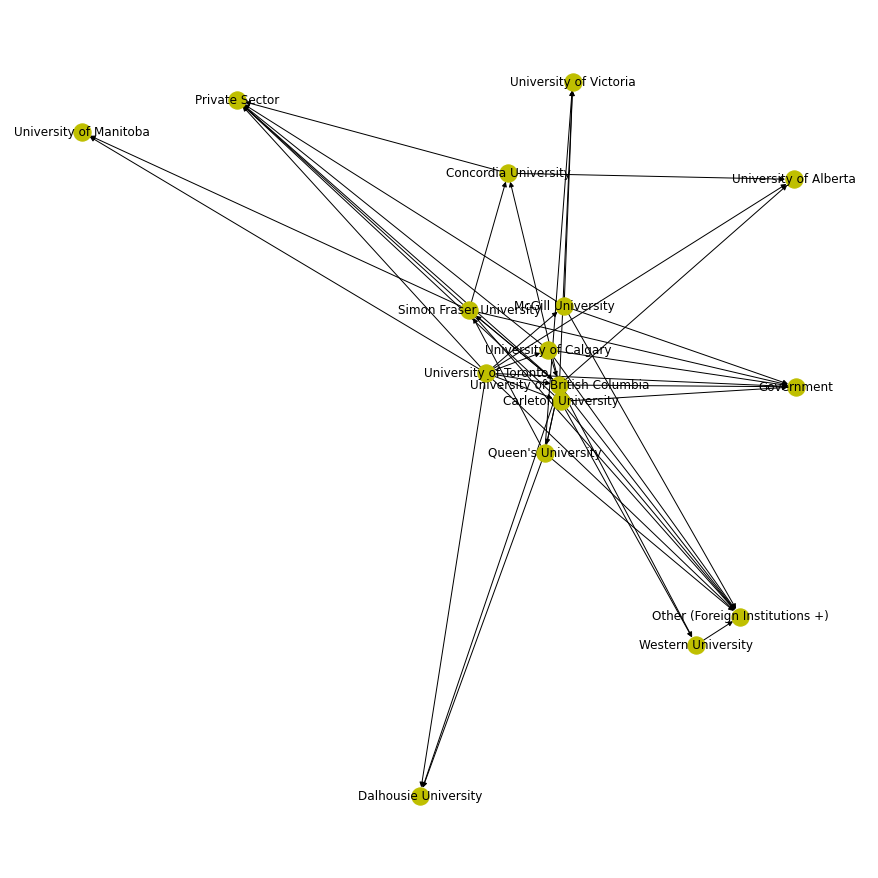

In [20]:
plt.figure(figsize = (12, 12)) 
nx.draw(digraph, with_labels = True, node_color = "y") #draw, draw_random, draw_circular, draw_spectral, draw_spring
plt.show()

In [37]:
FG = nx.from_pandas_edgelist(inst_data, source='to_name', target='from_institution_name', edge_attr=True,
                            create_using=nx.DiGraph())
FG.nodes()

NodeView(('Other (Foreign Institutions +)', 'University of Toronto', 'Government', 'University of British Columbia', 'Dalhousie University', 'Private Sector', 'Simon Fraser University', 'McGill University', 'Carleton University', 'University of Alberta', 'Western University', 'University of Calgary', "Queen's University", 'Concordia University', 'University of Victoria', 'University of Manitoba'))

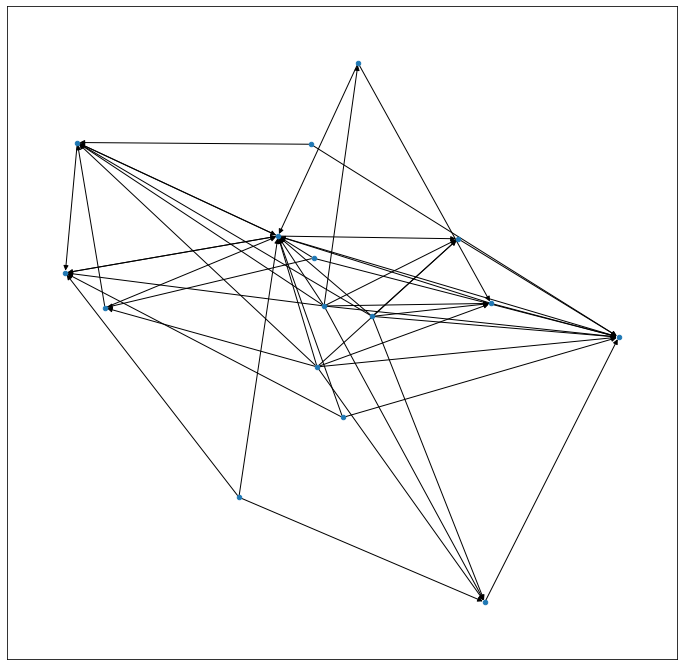

In [38]:
plt.figure(figsize = (12, 12)) 
nx.draw_networkx(FG, with_labels=False, node_size=20)

In [39]:
rankoutput = sorted(nx.algorithms.pagerank(FG).items(), key=lambda student: student[1])
rankoutput = pd.DataFrame(rankoutput)
rankoutput = rankoutput.rename(columns = {0: "oid", 1: "score"})
rankoutput

,oid,score
0,Other (Foreign Institutions +),0.009375
1,Government,0.009375
2,Private Sector,0.009375
3,University of Alberta,0.009375
4,University of Victoria,0.009375
5,University of Manitoba,0.009375
6,Dalhousie University,0.011905
7,Western University,0.014471
8,Carleton University,0.016938
9,Concordia University,0.018376


In [40]:
#rankoutput.merge(namedata, how = "left", on = "oid").sort_index(ascending = False)

In [41]:
Ia = nx.adjacency_matrix(digraph).toarray()
Ia

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [45]:
inst_data[inst_data.from_institution_name == "University of British Columbia"]

,aid,to_institution_id,to_name,to_oid,startdate,to_latitude,to_longitude,to_rank,recruiter_type,description,...,latitude,longitude,from_institution_name,from_shortname,from_department,category_id,name,rank,fromzip,tozip
202,11953,903,Other (Foreign Institutions +),1088,2012-07-01,28.526730,77.575363,NaN,1,Academic organization (economics department),...,49.271037,-123.250304,University of British Columbia,"Econ, Univ of British Columbia",Economics,1,Development; Growth,47.0,University of British Columbia,Other (Foreign Institutions +)
203,14746,429,Dalhousie University,496,2013-07-01,44.636663,-63.590197,NaN,1,Academic organization (economics department),...,49.271037,-123.250304,University of British Columbia,"Econ, Univ of British Columbia",Economics,1,Development; Growth,47.0,University of British Columbia,Dalhousie University
204,33460,1994,Private Sector,5423,2018-07-01,NaN,NaN,NaN,6,Private (for profit) business or organization,...,49.271037,-123.250304,University of British Columbia,"Econ, Univ of British Columbia",Economics,1,Development; Growth,47.0,University of British Columbia,Private Sector
205,36492,747,Other (Foreign Institutions +),886,2011-08-01,40.349067,-74.655533,13.0,1,Academic organization (economics department),...,49.271037,-123.250304,University of British Columbia,"Econ, Univ of British Columbia",Economics,1,Development; Growth,47.0,University of British Columbia,Other (Foreign Institutions +)
206,41662,351,Other (Foreign Institutions +),407,2020-07-01,51.514372,-0.116585,5.0,1,Academic organization (economics department),...,49.271037,-123.250304,University of British Columbia,"Econ, Univ of British Columbia",Economics,1,Development; Growth,47.0,University of British Columbia,Other (Foreign Institutions +)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7266,41422,1839,Other (Foreign Institutions +),2713,2019-07-01,21.296939,-157.817112,NaN,1,Academic organization (economics department),...,49.264824,-123.253794,University of British Columbia,"Business, U of British Columbia",Sauder School of Business,19,Urban; Rural; Regional Economics,NaN,University of British Columbia,Other (Foreign Institutions +)
7449,27597,1994,Private Sector,5423,2016-07-01,NaN,NaN,NaN,6,Private (for profit) business or organization,...,49.271037,-123.250304,University of British Columbia,"Econ, Univ of British Columbia",Economics,20,Health; Education; Welfare,47.0,University of British Columbia,Private Sector
7450,35058,2911,Other (Foreign Institutions +),4834,2016-07-01,NaN,NaN,NaN,1,Academic organization (economics department),...,49.271037,-123.250304,University of British Columbia,"Econ, Univ of British Columbia",Economics,20,Health; Education; Welfare,47.0,University of British Columbia,Other (Foreign Institutions +)
7451,28585,218,Other (Foreign Institutions +),253,2016-07-01,43.128066,-77.630657,NaN,1,Academic organization (economics department),...,49.271037,-123.250304,University of British Columbia,"Econ, Univ of British Columbia",Economics,23,Political Economy,47.0,University of British Columbia,Other (Foreign Institutions +)
